In [459]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [460]:
#loading dataset
pd.set_option('display.max_columns',None) # to disply all columns
data=pd.read_csv('gas_turbines.csv')
data.head(10)

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
5  7.6998  1010.7  92.708  3.5236  19.683  1059.8  549.97  114.72  10.626   
6  7.7901  1011.6  91.983  3.5298  19.659  1060.0  549.87  114.71  10.644   
7  7.7139  1012.7  91.348  3.5088  19.673  1059.8  549.92  114.71  10.656   
8  7.7975  1013.8  90.196  3.5141  19.634  1060.1  550.09  114.72  10.644   
9  8.0820  1015.0  88.597  4.0612  23.406  1083.0  550.21  131.70  11.679   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311  
5  3.4467  82.409  
6  3.4874  82.440  
7  3.6043  83.010  
8  3.3943  82.284  
9  1.9081  82.782

Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [461]:
#placing target column at index 0
T=data['TEY']     #target column

In [462]:
F=data.drop('TEY',axis=1)

In [463]:
# concaneting target and columns
df=pd.concat([T,F],axis=1)
df

TEY      AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP  \
0      114.70  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605   
1      114.72  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598   
2      114.71  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601   
3      114.72  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606   
4      114.72  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  111.61  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400   
15035  111.78  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433   
15036  110.19  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483   
15037  110.74  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533   
15038  111.58  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [464]:
df.shape

(15039, 11)

dataset has 15039 rows and 11 columns

In [465]:
# checking duplicate columns
df.columns

Index(['TEY', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
 4   AFDP    15039 non-null  float64
 5   GTEP    15039 non-null  float64
 6   TIT     15039 non-null  float64
 7   TAT     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


No Missing values and datatype also identified accuretly

In [467]:
# checking unique category in each column of dataset
df.nunique()

TEY      4207
AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
CDP      3611
CO      13096
NOX     11996
dtype: int64

After checking the first rows of data, we know the following are:
They are categorical attributes (object).


They are Numeriacal attributes (int64 & fload64).

They have contineous values.

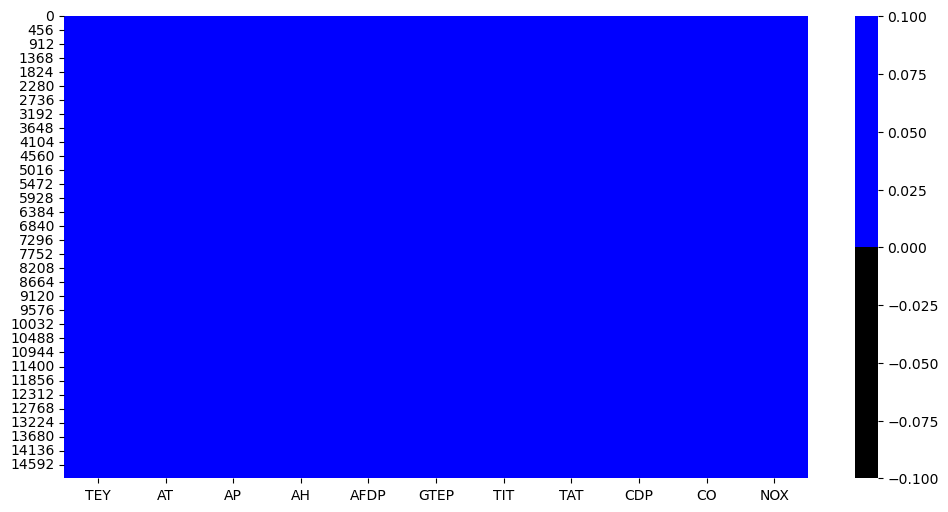

In [468]:
# Plot the heatmap to find more about Missing values

plt.figure(figsize=(12,6))
cols=df.columns
colors=['black','blue']

sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colors))
plt.show();

Looks like we don't have any null values. But plots sometimes deceive us, numbers don't. Let's check with the numbers

In [469]:
df.isnull().sum()

TEY     0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

In [470]:
# checking duplicate entries
df.duplicated().sum()

0

In [471]:
# Summary of numerical attributes:
# In essence, it is descriptive statistics (count, mean, standard deviation, minimum value, maximum value, and 25% - 50% - 75% percentile)
df.describe()

TEY            AT           AP            AH          AFDP  \
count  15039.000000  15039.000000  15039.00000  15039.000000  15039.000000   
mean     134.188464     17.764381   1013.19924     79.124174      4.200294   
std       15.829717      7.574323      6.41076     13.793439      0.760197   
min      100.170000      0.522300    985.85000     30.344000      2.087400   
25%      127.985000     11.408000   1008.90000     69.750000      3.723900   
50%      133.780000     18.186000   1012.80000     82.266000      4.186200   
75%      140.895000     23.862500   1016.90000     90.043500      4.550900   
max      174.610000     34.929000   1034.20000    100.200000      7.610600   

               GTEP           TIT           TAT           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean      25.419061   1083.798770    545.396183     12.102353      1.972499   
std        4.173916     16.527806      7.866803      1.103196      2.222206   
min       17.878000   1000.800000    512.450000      9.904400      0.000388   
25%       23.294000   1079.600000    542.170000     11.622000      0.858055   
50%       25.082000   1088.700000    549.890000     12.025000      1.390200   
75%       27.184000   1096.000000    550.060000     12.578000      2.160400   
max       37.402000   1100.800000    550.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

describe function shows only numerical columns information,Lets check outliers with the help of boxplot The features are not on the same scale. For exampleAP has a mean of 1013 while AT has a mean value of 17.76. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check further.

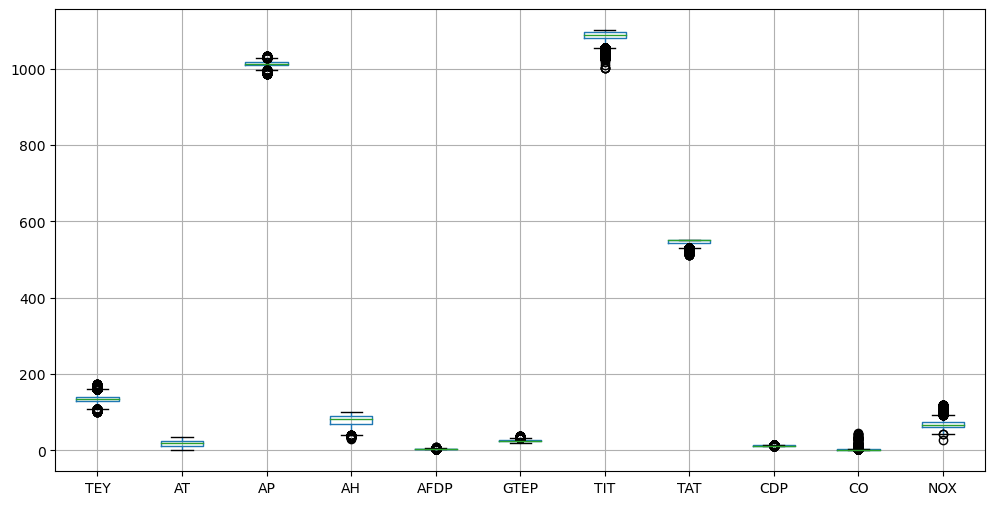

In [472]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.show();

From the box plot we can see that there are so many outliers,Lets treat only Extreme outliers

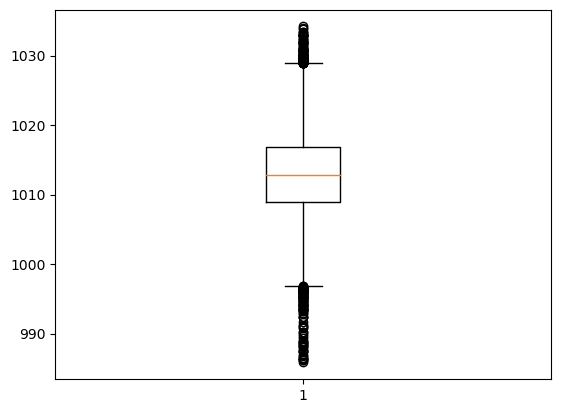

In [473]:
plt.boxplot(df['AP'])
plt.show()

data distribution is almost normal with outliers on bith sides and mean is at 1013

In [474]:
# applying winsorization technique to treat outliers
#calculating upper limit of data
upper_limit=df['AP'].quantile(0.99)
#calculating lower limit of data
lower_limit=df['AP'].quantile(0.01)
# Winsorization 
df['AP']=np.where(df['AP'] >= upper_limit,upper_limit,
    np.where(df['AP']<= lower_limit,lower_limit,df['AP']))

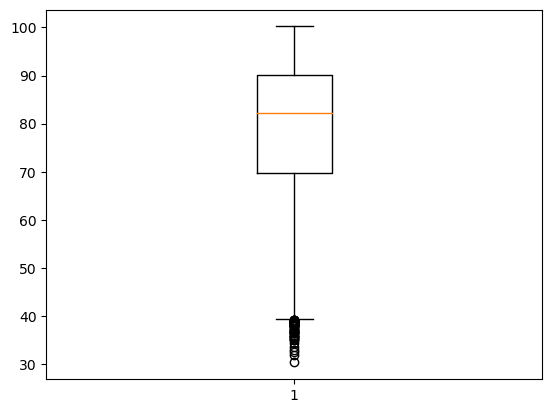

In [475]:
plt.boxplot(df['AH'])
plt.show()

In [476]:
#calculating upper limit of data
upper_limit=df['AH'].quantile(0.99)
#calculating lower limit of data
lower_limit=df['AH'].quantile(0.01)
# Winsorization 
df['AH']=np.where(df['AH'] >= upper_limit,upper_limit,
    np.where(df['AH']<= lower_limit,lower_limit,df['AH']))

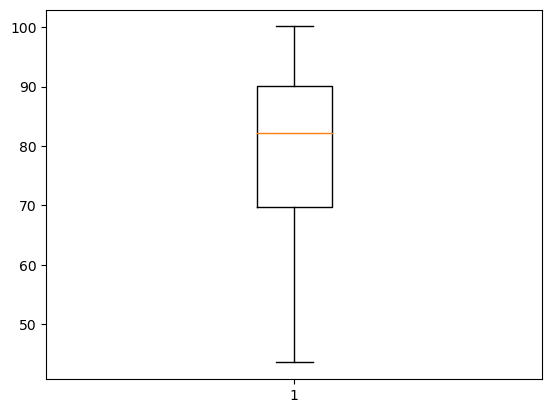

In [477]:
plt.boxplot(df['AH'])
plt.show()

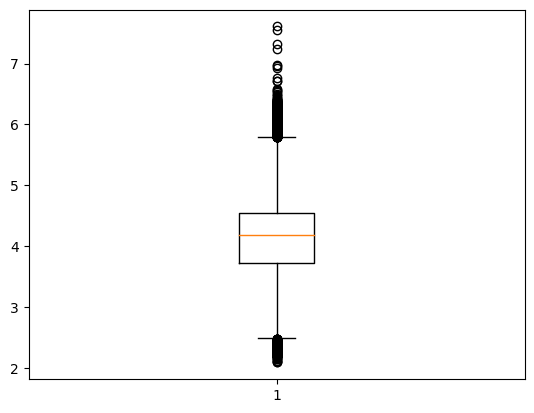

In [478]:
plt.boxplot(df['AFDP'])
plt.show()

In [479]:
#calculating upper limit of data
upper_limit=df['AFDP'].quantile(0.99)
#calculating lower limit of data
lower_limit=df['AFDP'].quantile(0.01)
# Winsorization 
df['AFDP']=np.where(df['AFDP'] >= upper_limit,upper_limit,
    np.where(df['AFDP']<= lower_limit,lower_limit,df['AFDP']))

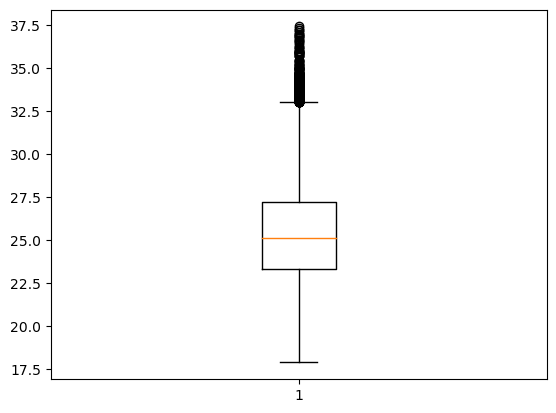

In [480]:
plt.boxplot(df['GTEP'])
plt.show()

In [481]:
#calculating upper limit of data
upper_limit=df['GTEP'].quantile(0.99)
#calculating lower limit of data
lower_limit=df['GTEP'].quantile(0.01)
# Winsorization 
df['GTEP']=np.where(df['GTEP'] >= upper_limit,upper_limit,
    np.where(df['GTEP']<= lower_limit,lower_limit,df['GTEP']))

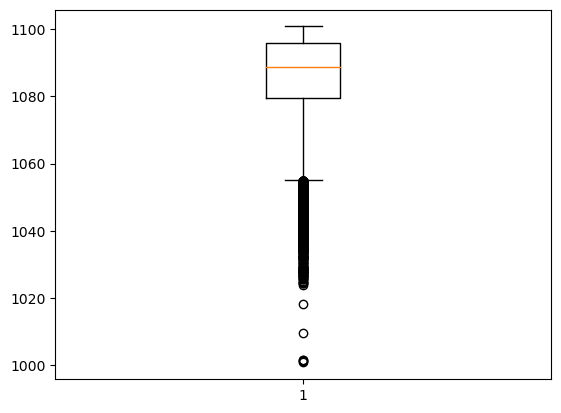

In [482]:
plt.boxplot(df['TIT'])
plt.show()

In [483]:
#calculating upper limit of data
upper_limit=df['TIT'].quantile(0.95)
#calculating lower limit of data
lower_limit=df['TIT'].quantile(0.05)
# Winsorization 
df['TIT']=np.where(df['TIT'] >= upper_limit,upper_limit,
    np.where(df['TIT']<= lower_limit,lower_limit,df['TIT']))

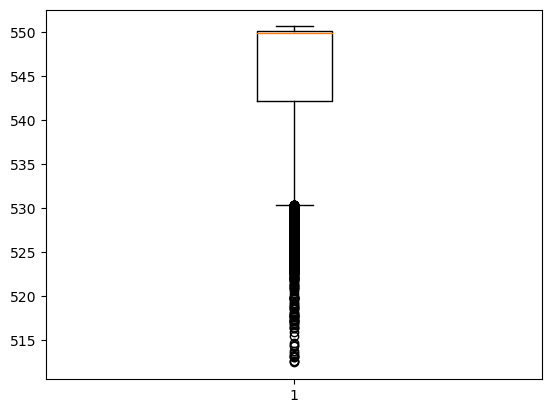

In [484]:
plt.boxplot(df['TAT'])
plt.show()

In [485]:
#calculating upper limit of data
upper_limit=df['TAT'].quantile(0.95)
#calculating lower limit of data
lower_limit=df['TAT'].quantile(0.05)
# Winsorization 
df['TAT']=np.where(df['TAT'] >= upper_limit,upper_limit,
    np.where(df['TAT']<= lower_limit,lower_limit,df['TAT']))

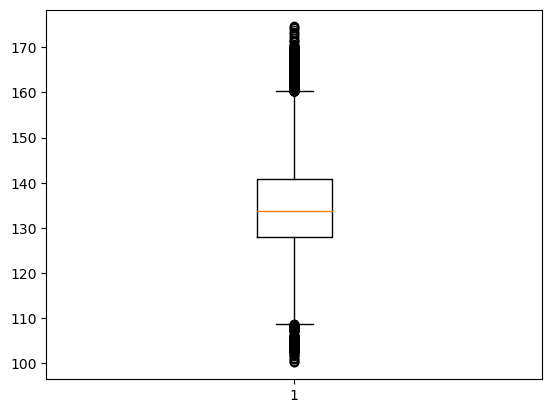

In [486]:
plt.boxplot(df['TEY'])
plt.show()

In [487]:
#calculating upper limit of data
upper_limit=df['TEY'].quantile(0.95)
#calculating lower limit of data
lower_limit=df['TEY'].quantile(0.05)
# Winsorization 
df['TEY']=np.where(df['TEY'] >= upper_limit,upper_limit,
    np.where(df['TEY']<= lower_limit,lower_limit,df['TEY']))

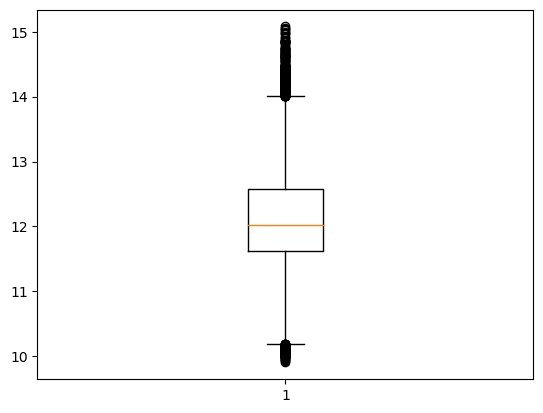

In [488]:
plt.boxplot(df['CDP'])
plt.show()

In [489]:
#calculating upper limit of data
upper_limit=df['CDP'].quantile(0.99)
#calculating lower limit of data
lower_limit=df['CDP'].quantile(0.01)
# Winsorization 
df['CDP']=np.where(df['CDP'] >= upper_limit,upper_limit,
    np.where(df['CDP']<= lower_limit,lower_limit,df['CDP']))

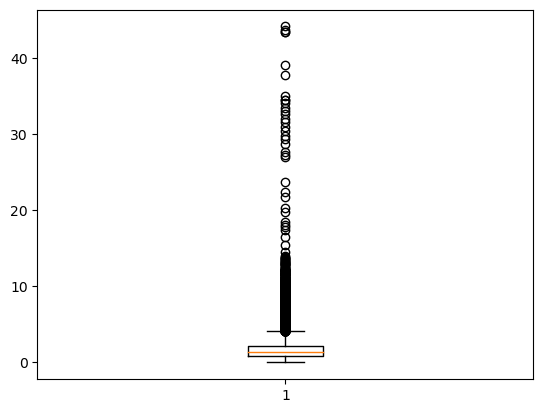

In [490]:
plt.boxplot(df['CO'])
plt.show()

In [491]:
#calculating upper limit of data
upper_limit=df['CO'].quantile(0.95)
#calculating lower limit of data
lower_limit=df['CO'].quantile(0.05)
# Winsorization 
df['CO']=np.where(df['CO'] >= upper_limit,upper_limit,
    np.where(df['CO']<= lower_limit,lower_limit,df['CO']))

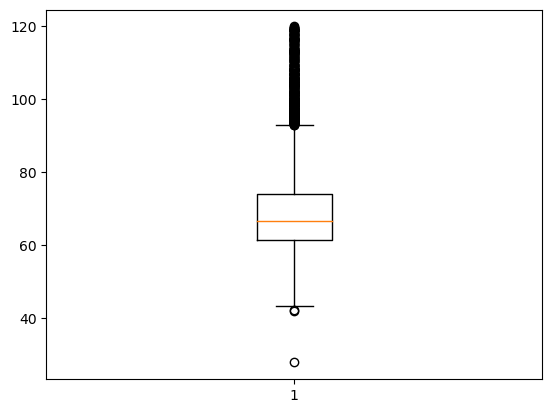

In [492]:
plt.boxplot(df['NOX'])
plt.show()

In [493]:
#calculating upper limit of data
upper_limit=df['NOX'].quantile(0.95)
#calculating lower limit of data
lower_limit=df['NOX'].quantile(0.05)
# Winsorization 
df['NOX']=np.where(df['NOX'] >= upper_limit,upper_limit,
    np.where(df['NOX']<= lower_limit,lower_limit,df['NOX']))

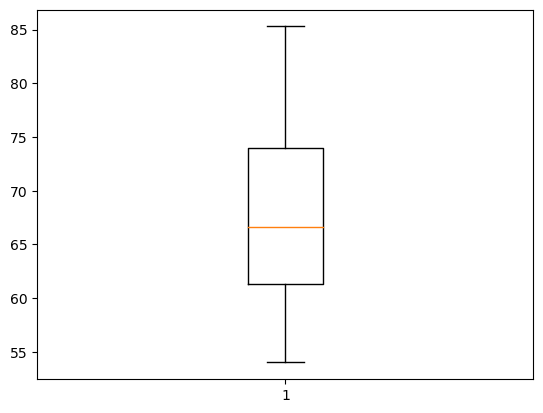

In [494]:
plt.boxplot(df['NOX'])
plt.show()

# data transformation

In [495]:
df.skew()

TEY     0.123311
AT     -0.030710
AP      0.217393
AH     -0.642665
AFDP    0.307339
GTEP    0.353491
TIT    -0.903798
TAT    -1.362963
CDP     0.253695
CO      1.346161
NOX     0.384989
dtype: float64

TAT and Co column has high skewness

<Figure size 2000x600 with 0 Axes>

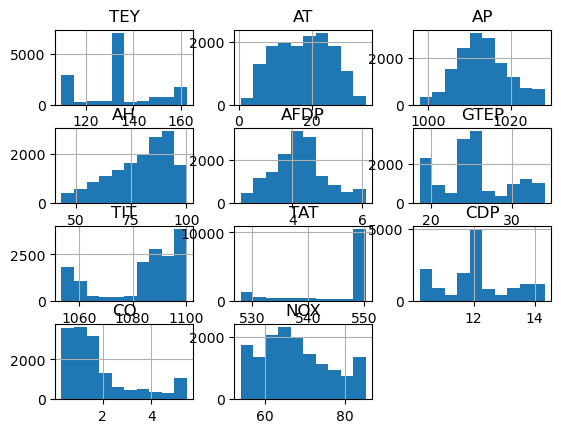

In [496]:
plt.figure(figsize=(20,6))
df.hist()
plt.show();

In [497]:
df.corr()

TEY        AT        AP        AH      AFDP      GTEP       TIT  \
TEY   1.000000 -0.199201  0.144576 -0.115415  0.719759  0.977010  0.911491   
AT   -0.199201  1.000000 -0.420106 -0.548986 -0.099904 -0.046455  0.073506   
AP    0.144576 -0.420106  1.000000  0.040568  0.045454  0.077329  0.046591   
AH   -0.115415 -0.548986  0.040568  1.000000 -0.122023 -0.204548 -0.253699   
AFDP  0.719759 -0.099904  0.045454 -0.122023  1.000000  0.745038  0.645389   
GTEP  0.977010 -0.046455  0.077329 -0.204548  0.745038  1.000000  0.896458   
TIT   0.911491  0.073506  0.046591 -0.253699  0.645389  0.896458  1.000000   
TAT  -0.722594  0.329848 -0.215934  0.014836 -0.575068 -0.757118 -0.419774   
CDP   0.988375 -0.098813  0.129570 -0.183666  0.728761  0.993910  0.908225   
CO   -0.706916 -0.057195  0.010190  0.210769 -0.434861 -0.676147 -0.805569   
NOX  -0.051876 -0.629933  0.255915  0.141934 -0.003629 -0.184844 -0.111633   

           TAT       CDP        CO       NOX  
TEY  -0.722594  0.988375 -0.706916 -0.051876  
AT    0.329848 -0.098813 -0.057195 -0.629933  
AP   -0.215934  0.129570  0.010190  0.255915  
AH    0.014836 -0.183666  0.210769  0.141934  
AFDP -0.575068  0.728761 -0.434861 -0.003629  
GTEP -0.757118  0.993910 -0.676147 -0.184844  
TIT  -0.419774  0.908225 -0.805569 -0.111633  
TAT   1.000000 -0.745650  0.223988  0.061045  
CDP  -0.745650  1.000000 -0.692607 -0.138913  
CO    0.223988 -0.692607  1.000000  0.189878  
NOX   0.061045 -0.138913  0.189878  1.000000

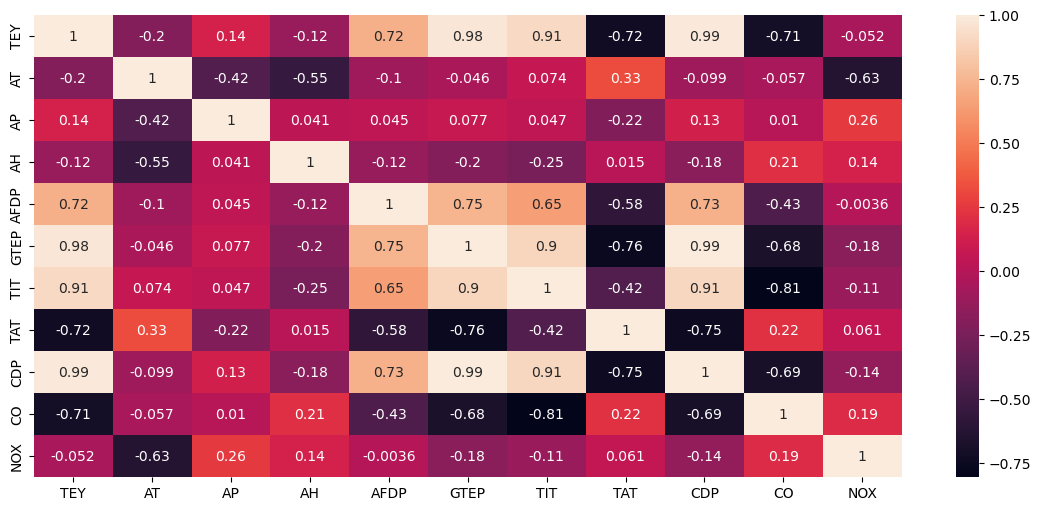

In [498]:
# checking correlation betweent feature and feature
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

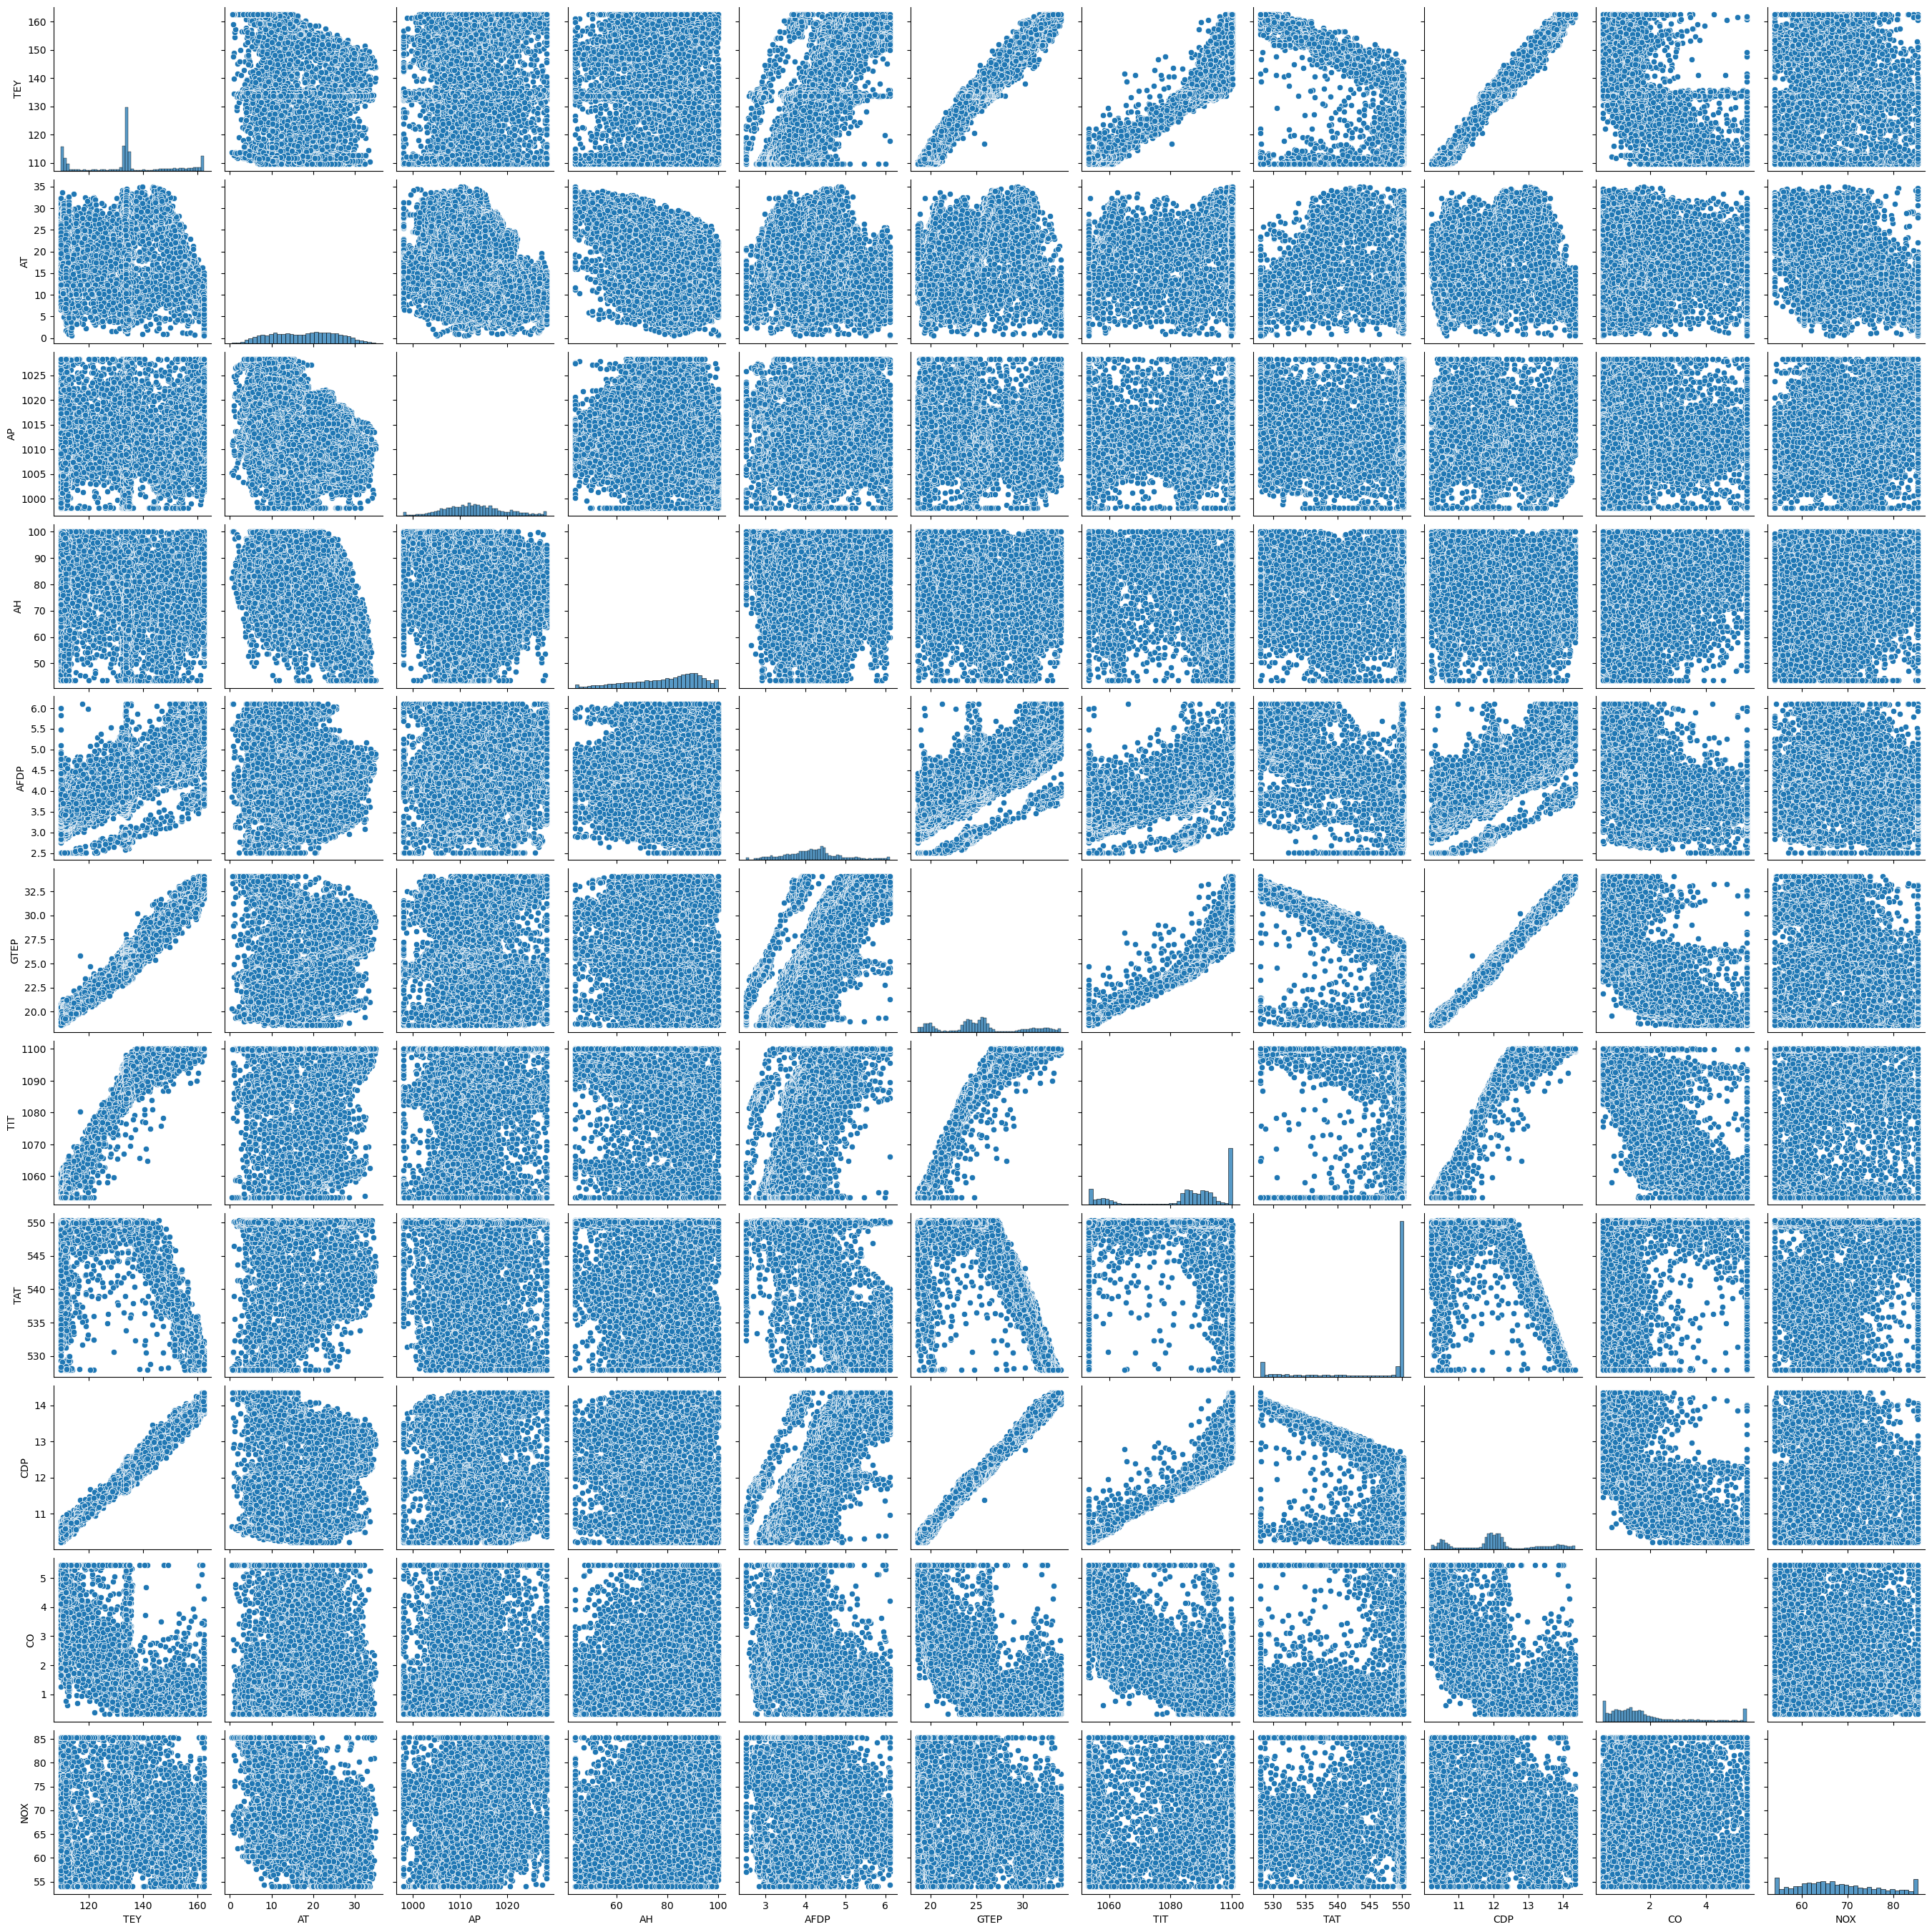

In [499]:
# lets check correlation by Visualization
sns.pairplot(df)
plt.show();

This gives us a much clearer idea of what features play a more or less important role in identifying with target TEY column. By heatmap it shows that correlation between target TEY has are very good correlation with GTEP,TIT,CDP.so if we treat their skewness their correlation value gets change.so we only transform those column who has minimum correlation between target.

C:\Users\PallaviJadhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


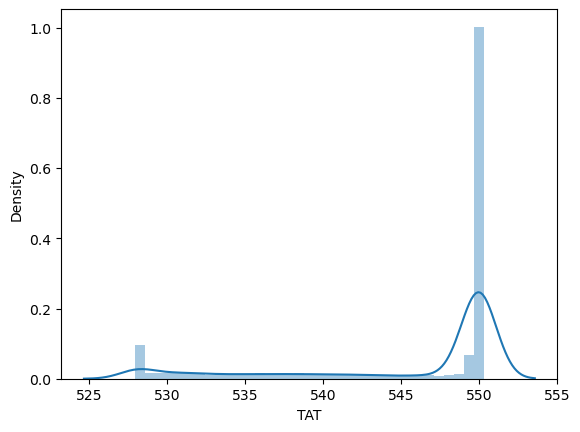

In [500]:
sns.distplot(df.TAT)
plt.show()

In [501]:
# square transformation for left skewed data
df['AH']=np.square(df['AH'])

In [502]:
# square transformation for left skewed data
df['TAT']=np.square(df['TAT'])

In [503]:
# cube-root transformation for right skewed data
df['CO']=np.cbrt(df['CO'])

# Feature Selection by using Mutual Information Feature Selection


In [504]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [505]:
# dividing data into feature and target
X=df.drop(['TEY'],axis=1)
X

AT      AP           AH    AFDP    GTEP     TIT          TAT  \
0      6.8594  1007.9  9370.046401  3.5000  19.663  1059.2  302500.0000   
1      6.7850  1008.4  9431.905924  3.4998  19.728  1059.3  302500.0000   
2      6.8977  1008.8  9204.291721  3.4824  19.779  1059.4  302357.0169   
3      7.0569  1009.2  9072.372001  3.4805  19.792  1059.6  302489.0001   
4      7.3978  1009.7  9053.522500  3.4976  19.765  1059.7  302478.0004   
...       ...     ...          ...     ...     ...     ...          ...   
15034  9.0301  1005.6  9694.371600  3.5421  19.164  1053.4  298345.3641   
15035  7.8879  1005.9  9819.422649  3.5059  19.414  1053.4  295087.9684   
15036  7.2647  1006.3  9899.454016  3.4770  19.530  1053.4  288712.7824   
15037  7.0060  1006.8  9802.584064  3.4486  19.377  1053.4  292940.7376   
15038  6.9279  1007.2  9512.686089  3.4275  19.306  1053.4  297952.2225   

          CDP        CO      NOX  
0      10.605  1.466626  82.7220  
1      10.598  1.479164  82.7760  
2      10.601  1.473797  82.4680  
3      10.606  1.472430  82.6700  
4      10.612  1.481005  82.3110  
...       ...       ...      ...  
15034  10.400  1.653235  79.5590  
15035  10.433  1.692353  79.9170  
15036  10.483  1.759138  85.2917  
15037  10.533  1.759138  85.2917  
15038  10.583  1.707876  85.2917  

[15039 rows x 10 columns]

In [506]:
y=df['TEY']
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

# # feature selection

In [507]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [508]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [509]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 0.370873
Feature 1: 0.132349
Feature 2: 0.092450
Feature 3: 0.623726
Feature 4: 1.539788
Feature 5: 1.269868
Feature 6: 0.867530
Feature 7: 1.660504
Feature 8: 0.491922
Feature 9: 0.286806


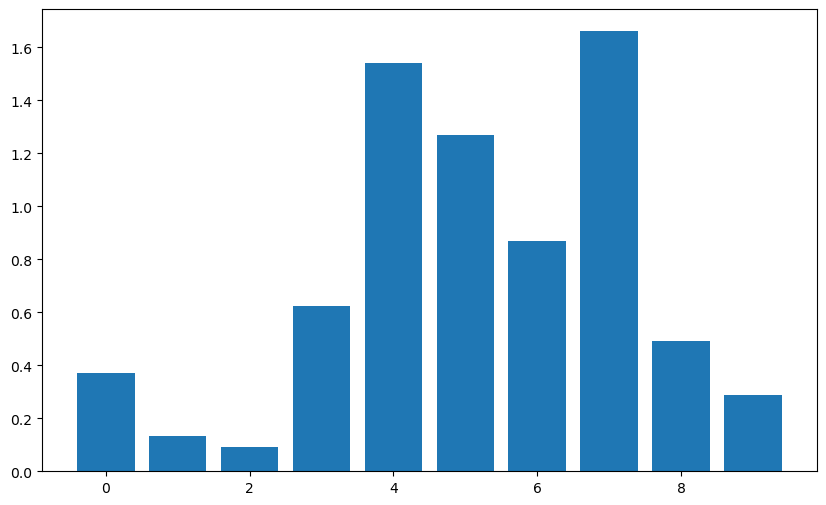

In [510]:
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [511]:
# dividing data into selected feature and target
X = df.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)

In [512]:
y = df['TEY']

In [513]:
# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [514]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

In [515]:
scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

AFDP      GTEP       TIT       TAT       CDP
0     -0.933982 -1.385603 -1.627878  0.596796 -1.363812
1     -0.934248 -1.369939 -1.621382  0.596796 -1.370191
2     -0.957456 -1.357649 -1.614887  0.579180 -1.367457
3     -0.959990 -1.354517 -1.601895  0.595441 -1.362901
4     -0.937183 -1.361023 -1.595399  0.594086 -1.357433
...         ...       ...       ...       ...       ...
15034 -0.877830 -1.505852 -2.004638  0.084931 -1.550630
15035 -0.926112 -1.445607 -2.004638 -0.316391 -1.520557
15036 -0.964658 -1.417653 -2.004638 -1.101836 -1.474992
15037 -1.002537 -1.454523 -2.004638 -0.580937 -1.429426
15038 -1.030679 -1.471633 -2.004638  0.036494 -1.383861

[15039 rows x 5 columns]

In [516]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [517]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (10527, 5)
Shape of x_test:  (4512, 5)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


# Artificial Neural Network Model - Backpropagation

In [518]:
from keras.models import Sequential
from keras.layers import Dense

In [519]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [520]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [521]:
# Fit the model
model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
264/264 [==============================] - 1s 1ms/step - loss: 0.9937 - mse: 0.9937
Epoch 2/100
264/264 [==============================] - 0s 2ms/step - loss: 0.9938 - mse: 0.9938
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9937 - mse: 0.9937
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9940 - mse: 0.9940
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9935 - mse: 0.9935
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9936 - mse: 0.9936
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9937 - mse: 0.9937
Epoch 8/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9937 - mse: 0.9937
Epoch 9/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9932 - mse: 0.9932
Epoch 10/100
264/264 [==============================] - 0s 2ms/step - loss: 0.9941 - mse: 0.9941
Epoch 11/100
264/264 [=================

# Artificial Neural Network Model - Tuning of All Hyperparameters

As dataset contains too many records, it will take much time to get the results. So we will use only first 500 records and try to tune the hyperparameters to get the best results.

In [522]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [523]:
X = data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
y = data.iloc[:,0] 

In [524]:
# Selecting first 500 records
X = X.iloc[0:500,:]

In [525]:
# Selecting first 500 records
y = y.iloc[0:500] 

In [526]:
# Scaling all the features
scaler.fit(X)
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

In [527]:
scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

AFDP      GTEP       TIT       TAT       CDP
0   -1.759902 -1.532845 -2.140879  0.597669 -1.637742
1   -1.760236 -1.516668 -2.132865  0.597669 -1.644533
2   -1.789273 -1.503977 -2.124851  0.584370 -1.641623
3   -1.792443 -1.500741 -2.108824  0.596646 -1.636771
4   -1.763907 -1.507461 -2.100811  0.595623 -1.630950
..        ...       ...       ...       ...       ...
495  0.427695  0.194256 -0.706435 -0.594154 -0.072722
496 -1.244251 -1.463412 -3.919909 -0.777275 -1.760964
497 -1.300155 -1.463661 -3.984018 -0.855025 -1.660057
498 -1.030481 -1.114010 -3.463131 -0.919476 -1.255462
499  0.972718  1.029685  1.144718 -0.334306  0.891710

[500 rows x 5 columns]

In [528]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [529]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (350, 5)
Shape of x_test:  (150, 5)
Shape of y_train:  (350,)
Shape of y_test:  (150,)


In [530]:
from sklearn.metrics import mean_squared_error

In [531]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model

In [532]:
# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0)

C:\Users\PallaviJadhav\AppData\Local\Temp\ipykernel_30844\3847299301.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0)


In [533]:
# Define the grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


In [451]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.190 total time=   2.4s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.938 total time=   2.3s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, ne

[CV 1/5; 6/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-1.166 total time=   2.1s
[CV 2/5; 6/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 6/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-0.940 total time=   2.2s
[CV 3/5; 6/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 6/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-0.977 total time=   2.1s
[CV 4/5; 6/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 6/256] END activati

[CV 2/5; 11/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-0.937 total time=   2.6s
[CV 3/5; 11/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 11/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-0.969 total time=   2.2s
[CV 4/5; 11/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 11/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-0.858 total time=   2.2s
[CV 5/5; 11/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 11/256] END a

[CV 3/5; 16/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-0.982 total time=   2.2s
[CV 4/5; 16/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 16/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-0.857 total time=   2.2s
[CV 5/5; 16/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 16/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.041 total time=   2.2s
[CV 1/5; 17/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 17/256] END acti

[CV 3/5; 21/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-0.975 total time=   3.8s
[CV 4/5; 21/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 21/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-0.855 total time=   3.5s
[CV 5/5; 21/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 21/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.040 total time=   3.7s
[CV 1/5; 22/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 22/256]

[CV 3/5; 26/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.968 total time=   3.4s
[CV 4/5; 26/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 26/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.858 total time=   3.5s
[CV 5/5; 26/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 26/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-1.041 total time=   3.5s
[CV 1/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 27/256]

[CV 4/5; 31/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.858 total time=   3.5s
[CV 5/5; 31/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 31/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-1.044 total time=   3.4s
[CV 1/5; 32/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 32/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.213 total time=   3.4s
[CV 2/5; 32/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 32/256] END a

[CV 5/5; 36/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-1.040 total time=   2.3s
[CV 1/5; 37/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 37/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.191 total time=   2.2s
[CV 2/5; 37/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 37/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-0.934 total time=   2.1s
[CV 3/5; 37/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 37/256] END 

[CV 1/5; 42/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-1.183 total time=   2.2s
[CV 2/5; 42/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 42/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.940 total time=   2.1s
[CV 3/5; 42/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 42/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.968 total time=   2.5s
[CV 4/5; 42/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 42/256] END a

[CV 2/5; 47/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.942 total time=   2.3s
[CV 3/5; 47/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 47/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.974 total time=   2.3s
[CV 4/5; 47/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 47/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.855 total time=   2.3s
[CV 5/5; 47/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 47/256] END activat

[CV 2/5; 52/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.939 total time=   3.4s
[CV 3/5; 52/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 52/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.968 total time=   3.4s
[CV 4/5; 52/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 52/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.856 total time=   3.7s
[CV 5/5; 52/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 5

[CV 2/5; 57/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.938 total time=   3.4s
[CV 3/5; 57/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 57/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.969 total time=   3.5s
[CV 4/5; 57/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 57/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.856 total time=   3.5s
[CV 5/5; 57/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 57/256]

[CV 3/5; 62/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-0.968 total time=   3.5s
[CV 4/5; 62/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 62/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-0.856 total time=   3.6s
[CV 5/5; 62/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 62/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-1.051 total time=   3.5s
[CV 1/5; 63/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 63/256] END a

[CV 4/5; 66/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.857 total time=   1.6s
[CV 5/5; 66/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 66/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-1.040 total time=   1.6s
[CV 1/5; 67/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 67/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-1.189 total time=   1.6s
[CV 2/5; 67/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 67/256]

[CV 5/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-1.040 total time=   1.6s
[CV 1/5; 72/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 72/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.187 total time=   1.6s
[CV 2/5; 72/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 72/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-0.936 total time=   1.6s
[CV 3/5; 72/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 72/256] END a

[CV 1/5; 77/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.196 total time=   1.6s
[CV 2/5; 77/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 77/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-0.945 total time=   1.5s
[CV 3/5; 77/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 77/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-0.967 total time=   1.6s
[CV 4/5; 77/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 77/256] END activat

[CV 2/5; 82/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.940 total time=   2.4s
[CV 3/5; 82/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 82/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.968 total time=   2.5s
[CV 4/5; 82/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 82/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.857 total time=   2.3s
[CV 5/5; 82/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 8

[CV 2/5; 87/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.936 total time=   2.3s
[CV 3/5; 87/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 87/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.966 total time=   2.3s
[CV 4/5; 87/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 87/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.868 total time=   2.3s
[CV 5/5; 87/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 87/256]

[CV 2/5; 92/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.939 total time=   2.4s
[CV 3/5; 92/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 92/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.968 total time=   2.3s
[CV 4/5; 92/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 92/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.857 total time=   2.4s
[CV 5/5; 92/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 92/256]

[CV 3/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.968 total time=   1.5s
[CV 4/5; 97/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.856 total time=   1.6s
[CV 5/5; 97/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.041 total time=   1.6s
[CV 1/5; 98/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 98/256]

[CV 3/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-0.969 total time=   1.6s
[CV 4/5; 102/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-0.858 total time=   1.6s
[CV 5/5; 102/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-1.043 total time=   1.6s
[CV 1/5; 103/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 103/256

[CV 3/5; 107/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-0.968 total time=   1.5s
[CV 4/5; 107/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 107/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-0.857 total time=   1.6s
[CV 5/5; 107/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 107/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-1.040 total time=   1.7s
[CV 1/5; 108/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 108/256

[CV 4/5; 112/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-0.857 total time=   1.5s
[CV 5/5; 112/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 112/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.040 total time=   1.6s
[CV 1/5; 113/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 113/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.184 total time=   2.3s
[CV 2/5; 113/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 113/

[CV 4/5; 117/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-0.858 total time=   2.3s
[CV 5/5; 117/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 117/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.040 total time=   2.4s
[CV 1/5; 118/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 118/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-1.189 total time=   2.3s
[CV 2/5; 118/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 1

[CV 4/5; 122/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.857 total time=   2.3s
[CV 5/5; 122/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 122/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-1.040 total time=   2.3s
[CV 1/5; 123/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 123/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-1.188 total time=   2.4s
[CV 2/5; 123/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 1

[CV 4/5; 127/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.861 total time=   2.4s
[CV 5/5; 127/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 127/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-1.041 total time=   2.4s
[CV 1/5; 128/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 128/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.190 total time=   2.4s
[CV 2/5; 128/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 128/256

[CV 4/5; 132/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.858 total time=   2.1s
[CV 5/5; 132/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 132/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-1.031 total time=   2.2s
[CV 1/5; 133/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 133/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.174 total time=   2.2s
[CV 2/5; 133/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[

[CV 4/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.850 total time=   3.3s
[CV 5/5; 137/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.045 total time=   2.2s
[CV 1/5; 138/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 138/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-1.211 total time=   2.1s
[CV 2/5; 138/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 

[CV 4/5; 142/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-0.856 total time=   2.2s
[CV 5/5; 142/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 142/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-1.039 total time=   2.2s
[CV 1/5; 143/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 143/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-1.154 total time=   2.1s
[CV 2/5; 143/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 1

[CV 4/5; 147/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-0.853 total time=   3.7s
[CV 5/5; 147/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 147/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-0.988 total time=   3.6s
[CV 1/5; 148/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 148/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-1.122 total time=   3.7s
[CV 2/5; 148/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, ne

[CV 4/5; 152/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.246 total time=   3.5s
[CV 5/5; 152/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 152/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.043 total time=   3.6s
[CV 1/5; 153/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 153/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.171 total time=   3.6s
[CV 2/5; 153/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=

[CV 4/5; 157/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-0.858 total time=   3.8s
[CV 5/5; 157/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 157/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.040 total time=   3.7s
[CV 1/5; 158/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 158/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-1.135 total time=   3.6s
[CV 2/5; 158/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 

[CV 4/5; 162/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.852 total time=   2.2s
[CV 5/5; 162/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 162/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-1.036 total time=   3.4s
[CV 1/5; 163/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 163/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-1.189 total time=   2.2s
[CV 2/5; 163/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=

[CV 4/5; 167/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.861 total time=   2.1s
[CV 5/5; 167/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 167/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-1.062 total time=   2.2s
[CV 1/5; 168/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 168/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.184 total time=   2.2s
[CV 2/5; 168/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 

[CV 4/5; 172/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.852 total time=   2.2s
[CV 5/5; 172/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 172/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.996 total time=   2.2s
[CV 1/5; 173/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 173/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.176 total time=   2.2s
[CV 2/5; 173/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5

[CV 4/5; 177/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.855 total time=   4.6s
[CV 5/5; 177/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 177/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.027 total time=   3.4s
[CV 1/5; 178/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 178/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-1.190 total time=   3.6s
[CV 2/5; 178/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, ne

[CV 4/5; 182/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-0.850 total time=   3.8s
[CV 5/5; 182/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 182/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-1.042 total time=   5.9s
[CV 1/5; 183/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 183/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-1.158 total time=   3.6s
[CV 2/5; 183/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=

[CV 4/5; 187/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-0.844 total time=   3.6s
[CV 5/5; 187/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 187/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-0.987 total time=   3.6s
[CV 1/5; 188/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 188/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-1.098 total time=   3.5s
[CV 2/5; 188/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=

[CV 4/5; 192/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-0.854 total time=   5.9s
[CV 5/5; 192/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 192/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.041 total time=   3.6s
[CV 1/5; 193/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 193/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.316 total time=   1.5s
[CV 2/5; 193/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[

[CV 4/5; 197/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-0.867 total time=   1.6s
[CV 5/5; 197/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 197/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.026 total time=   1.6s
[CV 1/5; 198/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 198/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-1.195 total time=   1.7s
[CV 2/5; 198/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 

[CV 4/5; 202/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.846 total time=   1.5s
[CV 5/5; 202/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 202/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-1.013 total time=   1.5s
[CV 1/5; 203/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 203/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-1.121 total time=   1.6s
[CV 2/5; 203/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 

[CV 4/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.850 total time=   1.5s
[CV 5/5; 207/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-1.061 total time=   1.6s
[CV 1/5; 208/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 208/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.196 total time=   1.5s
[CV 2/5; 208/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 2

[CV 4/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.869 total time=   2.3s
[CV 5/5; 212/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-1.009 total time=   2.4s
[CV 1/5; 213/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 213/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.200 total time=   2.3s
[CV 2/5; 213/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuro

[CV 4/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.851 total time=   2.3s
[CV 5/5; 217/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.981 total time=   3.3s
[CV 1/5; 218/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 218/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-1.141 total time=   2.3s
[CV 2/5; 218/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=

[CV 4/5; 222/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-0.854 total time=   2.3s
[CV 5/5; 222/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 222/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-1.025 total time=   2.4s
[CV 1/5; 223/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 223/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-1.213 total time=   2.3s
[CV 2/5; 223/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 

[CV 4/5; 227/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-0.845 total time=   1.6s
[CV 5/5; 227/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 227/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-1.025 total time=   1.5s
[CV 1/5; 228/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 228/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-1.253 total time=   1.5s
[CV 2/5; 228/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=

[CV 4/5; 232/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-0.853 total time=   1.6s
[CV 5/5; 232/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 232/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.070 total time=   1.5s
[CV 1/5; 233/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 233/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.206 total time=   1.8s
[CV 2/5; 233/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 

[CV 4/5; 237/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-0.866 total time=   1.5s
[CV 5/5; 237/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 237/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.008 total time=   1.5s
[CV 1/5; 238/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 238/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-1.189 total time=   1.5s
[CV 2/5; 238/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 2

[CV 4/5; 242/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.841 total time=   2.3s
[CV 5/5; 242/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 242/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-1.000 total time=   2.3s
[CV 1/5; 243/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 243/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-1.152 total time=   2.3s
[CV 2/5; 243/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, ne

[CV 4/5; 247/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-0.878 total time=   2.3s
[CV 5/5; 247/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 247/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-1.126 total time=   2.3s
[CV 1/5; 248/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 248/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-1.176 total time=   2.3s
[CV 2/5; 248/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=

[CV 4/5; 252/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.836 total time=   2.4s
[CV 5/5; 252/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 252/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-0.995 total time=   2.3s
[CV 1/5; 253/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 253/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-1.255 total time=   2.3s
[CV 2/5; 253/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[

In [534]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : -0.9486337225619804, using {'activation_function': 'linear', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 100, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 4}


So the best results are Best : -0.989548995284916, using {'activation_function': 'linear', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 100, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 4}

# Now creating a new model as per best results of GridSearchCV

In [535]:
# create model
final_model = Sequential()
final_model.add(Dense(4,input_dim = 5,kernel_initializer = 'uniform',activation = 'linear'))
final_model.add(Dropout(0.2))
final_model.add(Dense(2,input_dim = 4,kernel_initializer = 'uniform',activation = 'linear'))
final_model.add(Dropout(0.2))
final_model.add(Dense(1,activation = 'linear'))
    
adam=adam_v2.Adam(learning_rate = 0.01)

In [536]:
# Compile Model
final_model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])

In [537]:
# Fit the model
final_model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 7.9432 - mse: 7.9432
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 1.4649 - mse: 1.4649
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 1.9144 - mse: 1.9144
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 1.1731 - mse: 1.1731
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0062 - mse: 1.0062
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 1.1113 - mse: 1.1113
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 1.1321 - mse: 1.1321
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0310 - mse: 1.0310
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0522 - mse: 1.0522
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9858 - mse: 0.9858
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0094 

Epoch 89/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9850 - mse: 0.9850
Epoch 90/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0061 - mse: 1.0061
Epoch 91/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9924 - mse: 0.9924
Epoch 92/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9998 - mse: 0.9998
Epoch 93/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9814 - mse: 0.9814
Epoch 94/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9825 - mse: 0.9825
Epoch 95/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9851 - mse: 0.9851
Epoch 96/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9760 - mse: 0.9760
Epoch 97/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9719 - mse: 0.9719
Epoch 98/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9805 - mse: 0.9805
Epoch 99/100
9/9 [==============================] - 0s 2ms/step - loss

In [538]:
scores = final_model.evaluate(x_test, y_test)
print((final_model.metrics_names[1]))

5/5 [==============================] - 0s 4ms/step - loss: 0.9945 - mse: 0.9945
mse
